<a href="https://colab.research.google.com/github/samiha-mahin/Data-Analysis/blob/main/Handling_Missing_Values_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequent-Value Imputation**

---

### 💡 Frequent-Value Imputation (Most Common)

It means filling missing values with the **most common value** (also called the **mode**) in that column.

---

### 📊 Example:

| Gender |
| ------ |
| Male   |
| NaN    |
| Female |
| NaN    |
| Male   |

The most frequent value is **"Male"**, so after imputation:

| Gender |
| ------ |
| Male   |
| Male   |
| Female |
| Male   |
| Male   |

---

### ✅ Why use it?

* It’s good for **categorical columns** (like Gender, Country).
* Keeps the data consistent and simple.



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [14]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


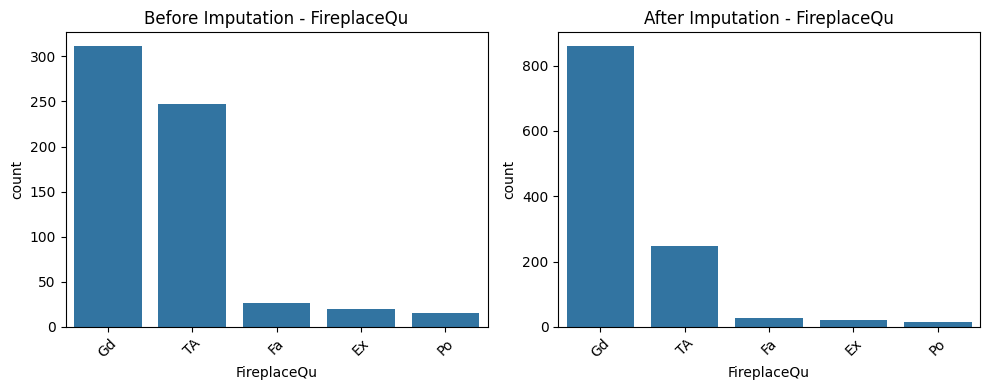

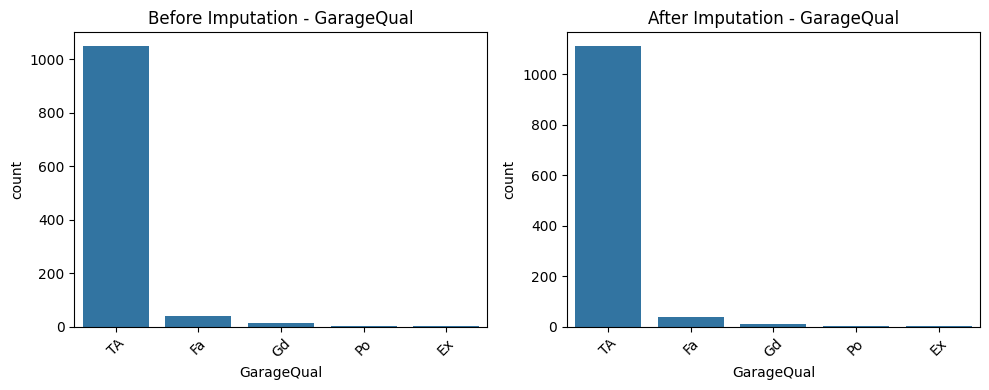

In [15]:

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=1
)

# Impute with most frequent values
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_raw)

# Convert back to DataFrame
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train_raw.columns)

# Plot function to compare counts
def plot_comparison(col):
    plt.figure(figsize=(10, 4))

    # Before
    plt.subplot(1, 2, 1)
    sns.countplot(x=X_train_raw[col], order=X_train_raw[col].value_counts().index)
    plt.title(f'Before Imputation - {col}')
    plt.xticks(rotation=45)

    # After
    plt.subplot(1, 2, 2)
    sns.countplot(x=X_train_imputed_df[col], order=X_train_imputed_df[col].value_counts().index)
    plt.title(f'After Imputation - {col}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Compare both columns
plot_comparison('FireplaceQu')
plot_comparison('GarageQual')



# **Missing-Category Imputation**

It means filling missing values in **categorical columns** with a **new label** like:

```
"Missing", "Unknown", or "None"
```

---

### 📊 Example:

| Color |
| ----- |
| Red   |
| NaN   |
| Blue  |
| NaN   |
| Green |

➡ After imputation with `'Missing'`:

| Color   |
| ------- |
| Red     |
| Missing |
| Blue    |
| Missing |
| Green   |

---

### ✅ Why use it?

* It **preserves information** that a value was missing.
* Works well when **missingness might carry meaning**.



In [16]:

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

imputer = SimpleImputer(strategy='constant',fill_value='Missing')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [17]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)